機械学習(GB,RF)のパラメータファイルを作るコード


In [1]:
from datetime import datetime
import os
import time


import numpy as np
import csv


import pandas as pd
from pandas import Series, DataFrame

#importとグラフの可視化の設定
import matplotlib.pyplot as plt
%matplotlib inline

#　スタイルは自分の好みで設定
plt.style.use("ggplot")

#高解像度の設定（きれいな図が出力されますがファイルサイズが大きくなります）
# %config InlineBackend.figure_formats = {'png', 'retina'}




In [2]:
#機械学習パッケージモジュールのインポート
from sklearn.model_selection import train_test_split

# 識別機の保存はJoblibを用いる
import joblib

In [3]:
#自作のモジュール
#PYS計算用式が入ったモジュール
from pysfunclib import fowler_func as ff

#機械学習の自動化とプロットのモジュール
from autoreglib import gridreg as gs

In [4]:
"""
モデルのステップとエネルギー範囲を指定
example: 4.2-6.2eV,0.05eV
        --> xl4262_005
        とする。
"""

xl_name_list=['xl5070_010','xl5070_005',
              'xl4070_010','xl4070_005',
              'xl4270_010',
              'xl4262_010','xl4262_005',
              'xl4060_010',
              'xl4265_005','xl4265_010',
              'xl4067_010','xl4067_005',
              'xl5067_010','xl5067_005',
              'xl3462_010','xl3462_005',
             ]

In [5]:
#作成した識別機を保存するフォルダー
tdatetime = datetime.now()
tstr = 'spys_reg_{}'.format(tdatetime.strftime('%Y%m%d'))
print('Dir name: ', tstr)

# 名前が「日時」のフォルダを作成。既に存在している場合は上書きされる。
os.makedirs(tstr, exist_ok=True)

#カレントディレクトリーに作成します。その中にファイルが入るようにします。
dir_tstr=".//{}//".format(tstr)


Dir name:  spys_reg_20200702


Start time:  20200702 08:22:53
energy range, step: xl5070_010
X data list: start, end, step 5.0 7.0 0.1

x data(energy):[5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7
 6.8 6.9 7. ]

nor:30, ip:14, tp:5, bg:5, total spectra:10500
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6]
tp list:[100, 300, 500, 700, 900]
bg list:[0, 5, 25, 50, 100]

total: 10500
Normal(XL): 7707 7707
(7707, 21) (7707,)

GradientBoostingRegressor
R2 Training Best score : 0.9991600600376535
R2 Test Best score : 0.9974347162254772
Best paramator: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

GradientBoostingRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.997

Test Root Mean Squared Error (RMSE): 0.01921054044873661
Test Mean Absolute Error (MAE): 0.013331137624234298
Test RMSE/MAE: 1.4410278395006824



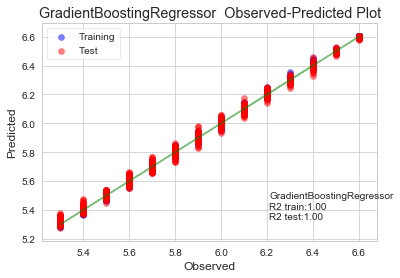

GradientBoostingRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.997


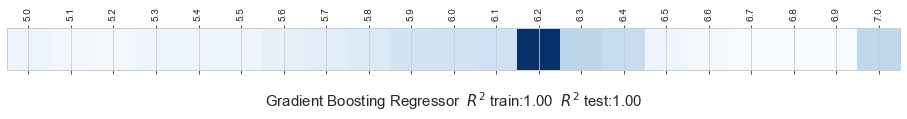

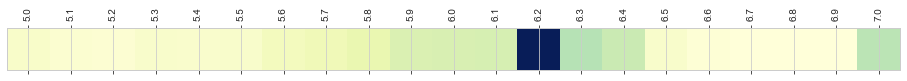

GradientBoostingRegressor
R2 Training Best score : 0.999
R Test Best score : 0.997


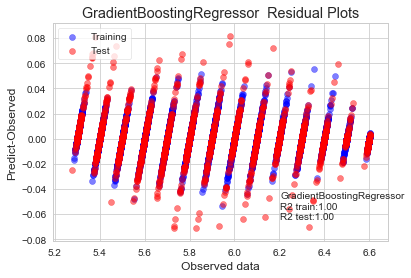

GradientBoostingRegressor
R2 Training Best score : 0.9991600600376535
R2 Test Best score : 0.9974347162254772
Number of features: 21
Number of features used: 21


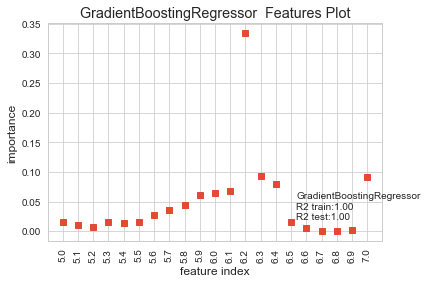

GB_elapsed_time:22.60831379890442 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.9996173270731762
R2 Test Best score : 0.9976219189506863
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998

Test Root Mean Squared Error (RMSE): 0.018496314527560113
Test Mean Absolute Error (MAE): 0.009997730220493602
Test RMSE/MAE: 1.8500513736253752



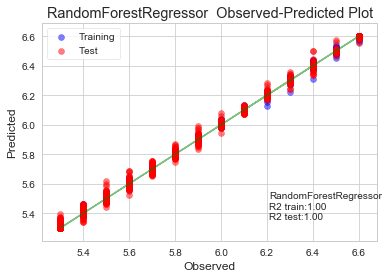

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998


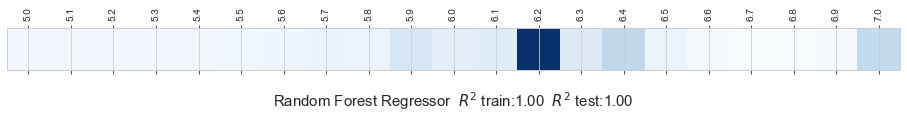

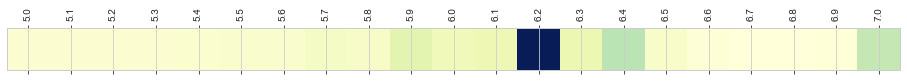

RandomForestRegressor
R2 Training Best score : 1.000
R Test Best score : 0.998


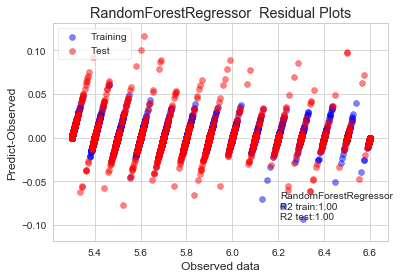

RandomForestRegressor
R2 Training Best score : 0.9996173270731762
R2 Test Best score : 0.9976219189506863
Number of features: 21
Number of features used: 21


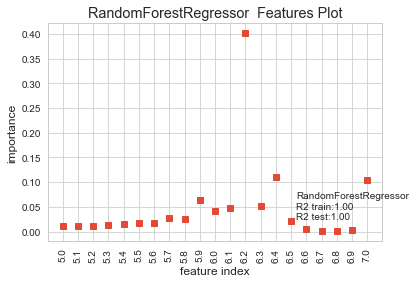

RF_elapsed_time:21.307244539260864 [sec]
-----

Save File Name:  sgb_xl5070_010.pkl srf_xl5070_010.pkl
elapsed_time:54.13073754310608 [sec]
finished time:  20200702 08:23:48
---------------------------------------------------------------------

Start time:  20200702 08:23:48
energy range, step: xl5070_005
X data list: start, end, step 5.0 7.0 0.05

x data(energy):[5.   5.05 5.1  5.15 5.2  5.25 5.3  5.35 5.4  5.45 5.5  5.55 5.6  5.65
 5.7  5.75 5.8  5.85 5.9  5.95 6.   6.05 6.1  6.15 6.2  6.25 6.3  6.35
 6.4  6.45 6.5  6.55 6.6  6.65 6.7  6.75 6.8  6.85 6.9  6.95 7.  ]

nor:30, ip:17, tp:5, bg:5, total spectra:12750
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8]
tp list:[100, 300, 500, 700, 900]
bg list:[0, 5, 25, 50, 100]

total: 12750
Normal(XL): 8698 8698
(8698, 41) (8698,)

GradientBoostingRegressor
R2 Training Best score 

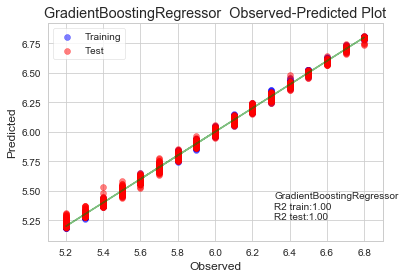

GradientBoostingRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.998


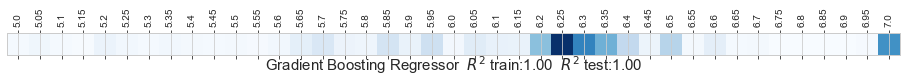

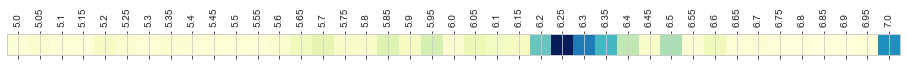

GradientBoostingRegressor
R2 Training Best score : 0.999
R Test Best score : 0.998


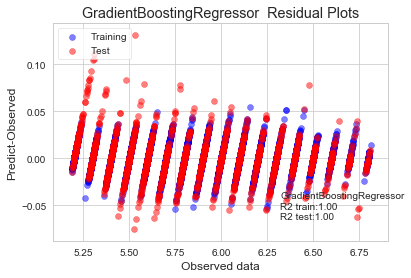

GradientBoostingRegressor
R2 Training Best score : 0.999242320853383
R2 Test Best score : 0.9977739884731125
Number of features: 41
Number of features used: 41


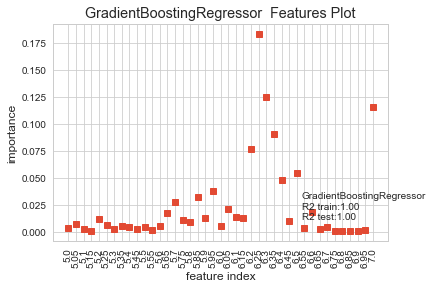

GB_elapsed_time:45.95721435546875 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.9997079785577303
R2 Test Best score : 0.9979190686026838
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998

Test Root Mean Squared Error (RMSE): 0.019990410775881984
Test Mean Absolute Error (MAE): 0.01132155172414035
Test RMSE/MAE: 1.7656953095270043



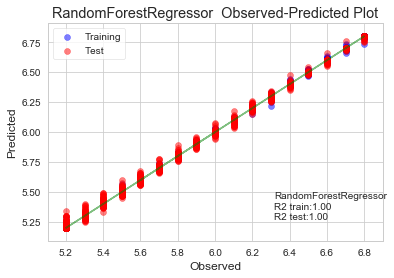

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998


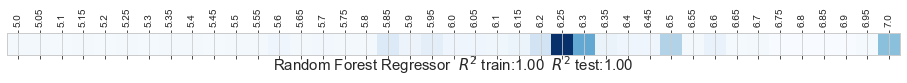

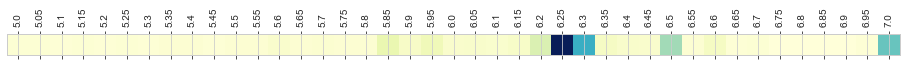

RandomForestRegressor
R2 Training Best score : 1.000
R Test Best score : 0.998


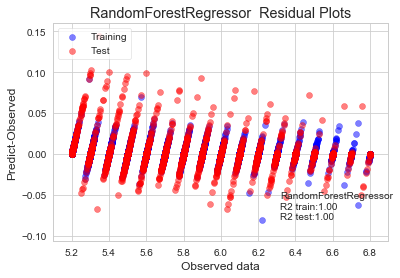

RandomForestRegressor
R2 Training Best score : 0.9997079785577303
R2 Test Best score : 0.9979190686026838
Number of features: 41
Number of features used: 41


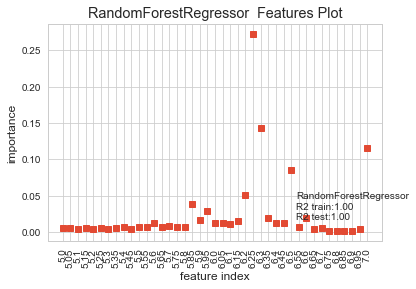

RF_elapsed_time:44.74072480201721 [sec]
-----

Save File Name:  sgb_xl5070_005.pkl srf_xl5070_005.pkl
elapsed_time:113.41233134269714 [sec]
finished time:  20200702 08:25:41
---------------------------------------------------------------------

Start time:  20200702 08:25:41
energy range, step: xl4070_010
X data list: start, end, step 4.0 7.0 0.1

x data(energy):[4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7
 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7. ]

nor:30, ip:24, tp:5, bg:5, total spectra:18000
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.
 6.1 6.2 6.3 6.4 6.5 6.6]
tp list:[100, 300, 500, 700, 900]
bg list:[0, 5, 25, 50, 100]

total: 18000
Normal(XL): 13826 13826
(13826, 31) (13826,)

GradientBoostingRegressor
R2 Training Best score : 0.9992805351769636
R2 Test Best score : 0.9985084

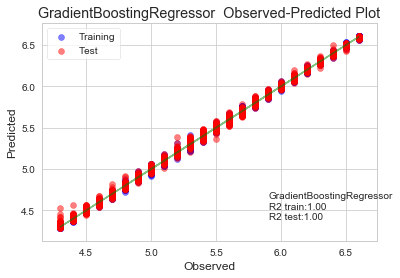

GradientBoostingRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.999


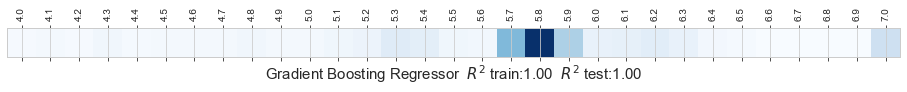

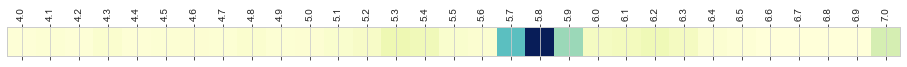

GradientBoostingRegressor
R2 Training Best score : 0.999
R Test Best score : 0.999


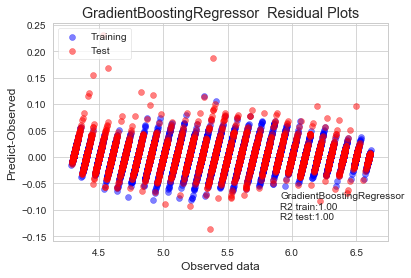

GradientBoostingRegressor
R2 Training Best score : 0.9992805351769636
R2 Test Best score : 0.9985084997143099
Number of features: 31
Number of features used: 31


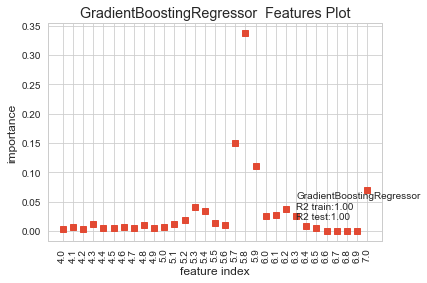

GB_elapsed_time:54.7139675617218 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.99981030825226
R2 Test Best score : 0.9988515940682274
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.999

Test Root Mean Squared Error (RMSE): 0.022334301896740315
Test Mean Absolute Error (MAE): 0.012099783080261666
Test RMSE/MAE: 1.8458431650046836



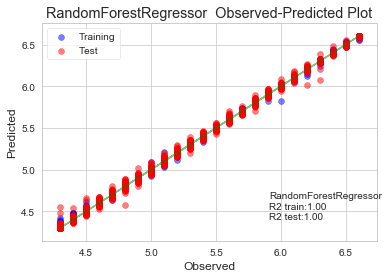

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.999


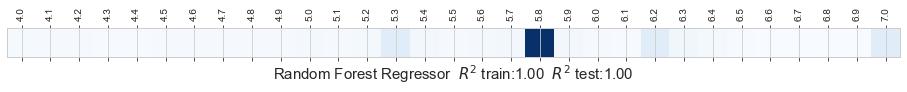

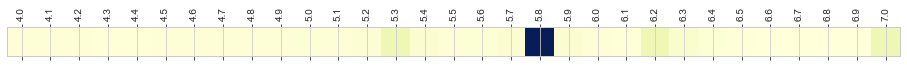

RandomForestRegressor
R2 Training Best score : 1.000
R Test Best score : 0.999


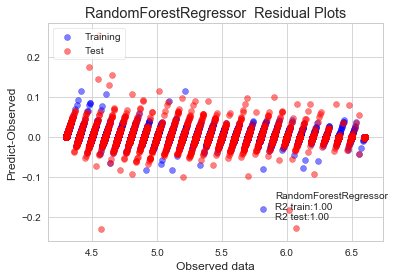

RandomForestRegressor
R2 Training Best score : 0.99981030825226
R2 Test Best score : 0.9988515940682274
Number of features: 31
Number of features used: 31


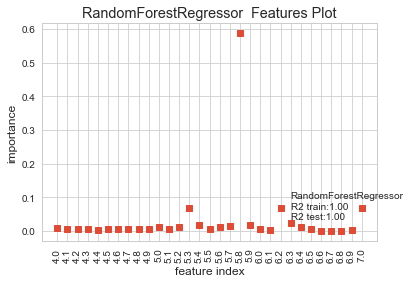

RF_elapsed_time:57.789265871047974 [sec]
-----

Save File Name:  sgb_xl4070_010.pkl srf_xl4070_010.pkl
elapsed_time:138.81478333473206 [sec]
finished time:  20200702 08:28:00
---------------------------------------------------------------------

Start time:  20200702 08:28:00
energy range, step: xl4070_005
X data list: start, end, step 4.0 7.0 0.05

x data(energy):[4.   4.05 4.1  4.15 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65
 4.7  4.75 4.8  4.85 4.9  4.95 5.   5.05 5.1  5.15 5.2  5.25 5.3  5.35
 5.4  5.45 5.5  5.55 5.6  5.65 5.7  5.75 5.8  5.85 5.9  5.95 6.   6.05
 6.1  6.15 6.2  6.25 6.3  6.35 6.4  6.45 6.5  6.55 6.6  6.65 6.7  6.75
 6.8  6.85 6.9  6.95 7.  ]

nor:30, ip:27, tp:5, bg:5, total spectra:20250
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8]
tp list:[100, 300, 500,

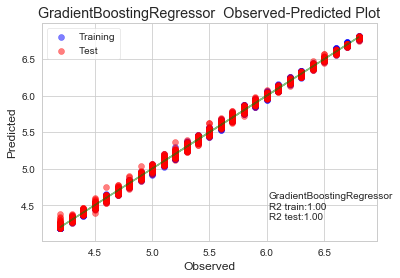

GradientBoostingRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.999


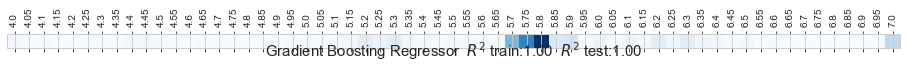

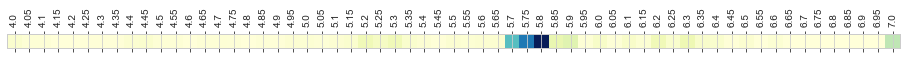

GradientBoostingRegressor
R2 Training Best score : 0.999
R Test Best score : 0.999


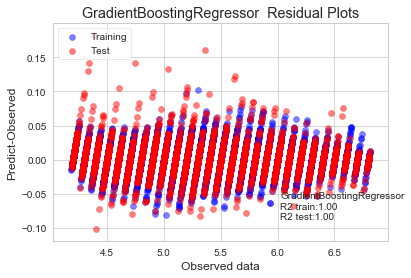

GradientBoostingRegressor
R2 Training Best score : 0.9994466537371964
R2 Test Best score : 0.9988480884598637
Number of features: 61
Number of features used: 61


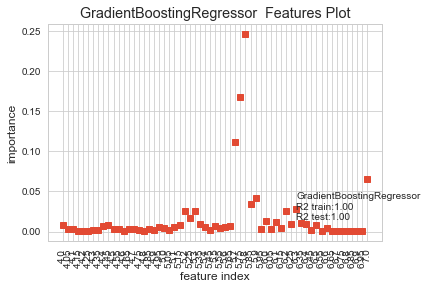

GB_elapsed_time:115.79927825927734 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.9998238131212832
R2 Test Best score : 0.9988352970949866
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.999

Test Root Mean Squared Error (RMSE): 0.024348652976884072
Test Mean Absolute Error (MAE): 0.012916301046239444
Test RMSE/MAE: 1.8851103647799488



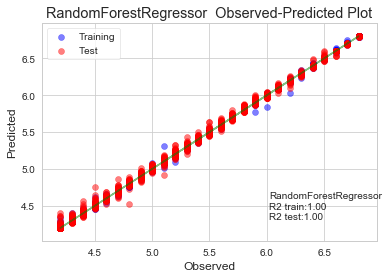

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.999


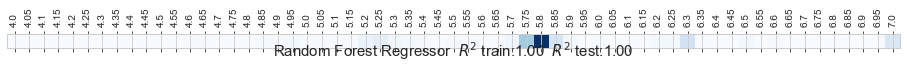

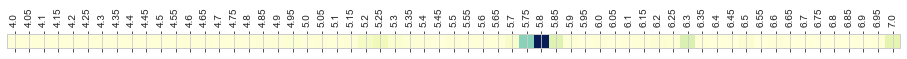

RandomForestRegressor
R2 Training Best score : 1.000
R Test Best score : 0.999


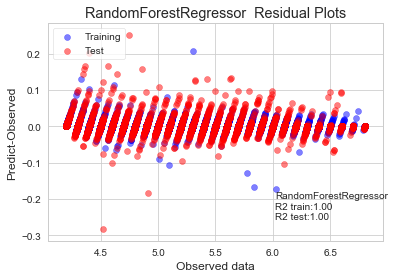

RandomForestRegressor
R2 Training Best score : 0.9998238131212832
R2 Test Best score : 0.9988352970949866
Number of features: 61
Number of features used: 61


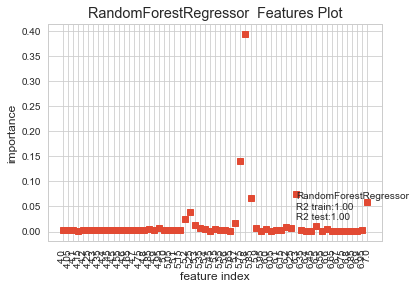

RF_elapsed_time:119.30529022216797 [sec]
-----

Save File Name:  sgb_xl4070_005.pkl srf_xl4070_005.pkl
elapsed_time:288.4171099662781 [sec]
finished time:  20200702 08:32:48
---------------------------------------------------------------------

Start time:  20200702 08:32:48
energy range, step: xl4270_010
X data list: start, end, step 4.2 7.0 0.1

x data(energy):[4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7. ]

nor:30, ip:22, tp:5, bg:5, total spectra:16500
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2
 6.3 6.4 6.5 6.6]
tp list:[100, 300, 500, 700, 900]
bg list:[0, 5, 25, 50, 100]

total: 16500
Normal(XL): 12609 12609
(12609, 29) (12609,)

GradientBoostingRegressor
R2 Training Best score : 0.9992691525068131
R2 Test Best score : 0.9983739114500192
Best 

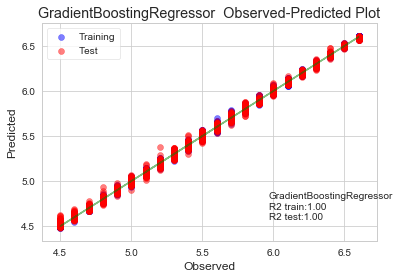

GradientBoostingRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.998


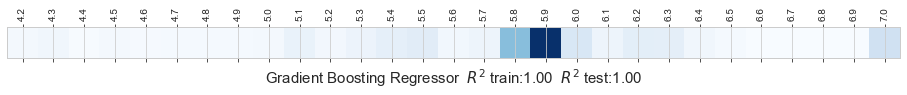

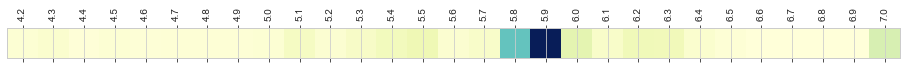

GradientBoostingRegressor
R2 Training Best score : 0.999
R Test Best score : 0.998


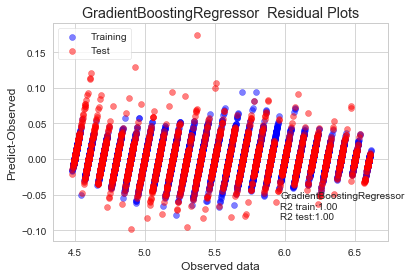

GradientBoostingRegressor
R2 Training Best score : 0.9992691525068131
R2 Test Best score : 0.9983739114500192
Number of features: 29
Number of features used: 29


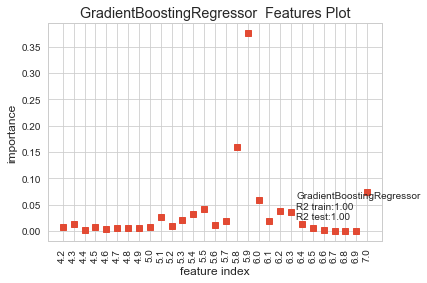

GB_elapsed_time:47.32957148551941 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.9997840601937327
R2 Test Best score : 0.99853596352599
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.999

Test Root Mean Squared Error (RMSE): 0.023055276987851328
Test Mean Absolute Error (MAE): 0.012391752577321788
Test RMSE/MAE: 1.8605339998512327



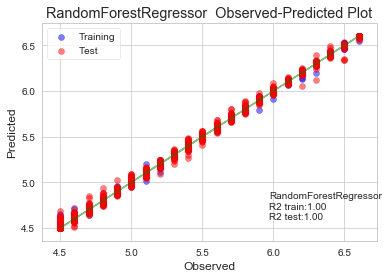

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.999


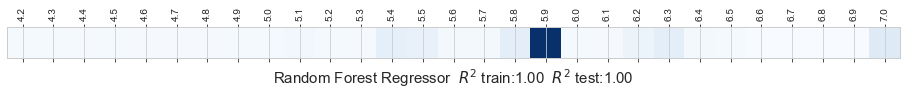

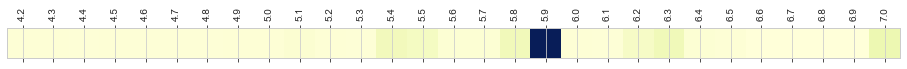

RandomForestRegressor
R2 Training Best score : 1.000
R Test Best score : 0.999


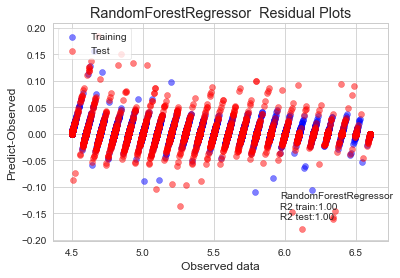

RandomForestRegressor
R2 Training Best score : 0.9997840601937327
R2 Test Best score : 0.99853596352599
Number of features: 29
Number of features used: 29


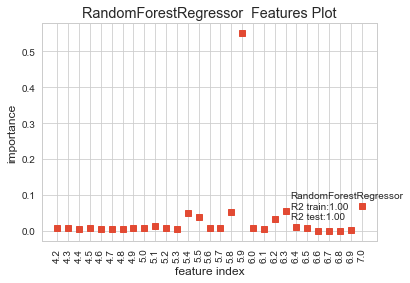

RF_elapsed_time:49.10279726982117 [sec]
-----

Save File Name:  sgb_xl4270_010.pkl srf_xl4270_010.pkl
elapsed_time:119.55513858795166 [sec]
finished time:  20200702 08:34:48
---------------------------------------------------------------------

Start time:  20200702 08:34:48
energy range, step: xl4262_010
X data list: start, end, step 4.2 6.2 0.1

x data(energy):[4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.2]

nor:30, ip:14, tp:5, bg:5, total spectra:10500
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8]
tp list:[100, 300, 500, 700, 900]
bg list:[0, 5, 25, 50, 100]

total: 10500
Normal(XL): 7707 7707
(7707, 21) (7707,)

GradientBoostingRegressor
R2 Training Best score : 0.9991600600376535
R2 Test Best score : 0.9974155220142401
Best paramator: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200

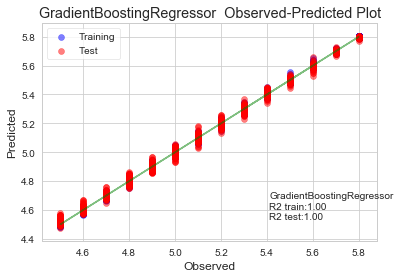

GradientBoostingRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.997


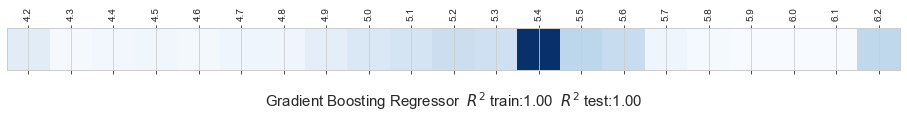

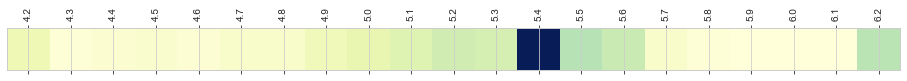

GradientBoostingRegressor
R2 Training Best score : 0.999
R Test Best score : 0.997


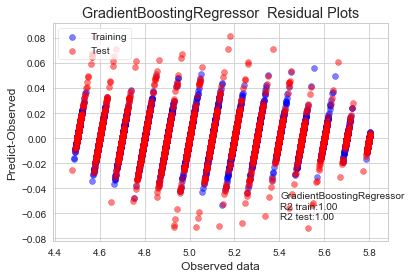

GradientBoostingRegressor
R2 Training Best score : 0.9991600600376535
R2 Test Best score : 0.9974155220142401
Number of features: 21
Number of features used: 21


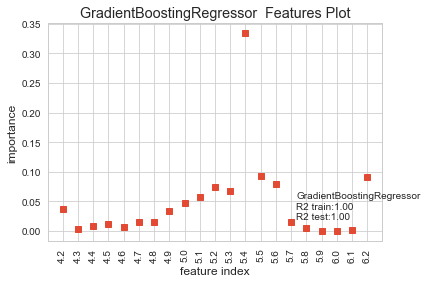

GB_elapsed_time:21.39667272567749 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.9996143812176238
R2 Test Best score : 0.9975737432894927
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998

Test Root Mean Squared Error (RMSE): 0.018682726265200882
Test Mean Absolute Error (MAE): 0.010023022049290212
Test RMSE/MAE: 1.8639813594467662



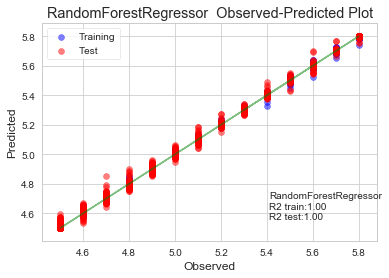

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998


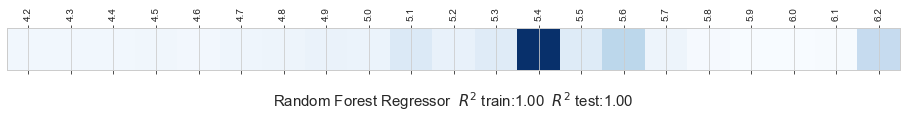

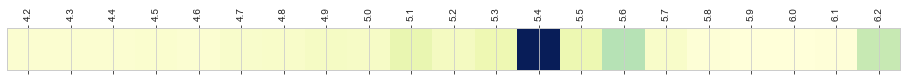

RandomForestRegressor
R2 Training Best score : 1.000
R Test Best score : 0.998


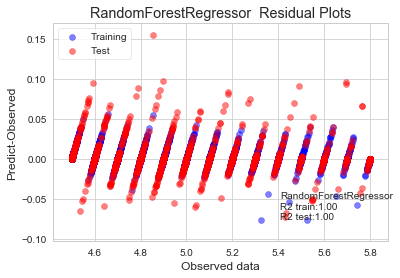

RandomForestRegressor
R2 Training Best score : 0.9996143812176238
R2 Test Best score : 0.9975737432894927
Number of features: 21
Number of features used: 21


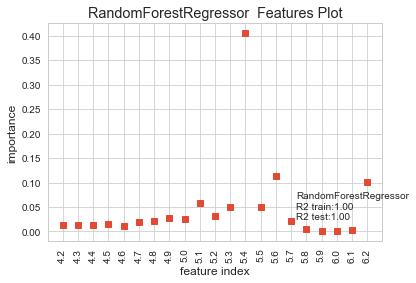

RF_elapsed_time:21.777900218963623 [sec]
-----

Save File Name:  sgb_xl4262_010.pkl srf_xl4262_010.pkl
elapsed_time:53.13447308540344 [sec]
finished time:  20200702 08:35:41
---------------------------------------------------------------------

Start time:  20200702 08:35:41
energy range, step: xl4262_005
X data list: start, end, step 4.2 6.2 0.05

x data(energy):[4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85
 4.9  4.95 5.   5.05 5.1  5.15 5.2  5.25 5.3  5.35 5.4  5.45 5.5  5.55
 5.6  5.65 5.7  5.75 5.8  5.85 5.9  5.95 6.   6.05 6.1  6.15 6.2 ]

nor:30, ip:17, tp:5, bg:5, total spectra:12750
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[4.4 4.4 4.6 4.6 4.8 4.9 4.9 5.1 5.1 5.3 5.4 5.4 5.6 5.6 5.8 5.9 5.9]
tp list:[100, 300, 500, 700, 900]
bg list:[0, 5, 25, 50, 100]

total: 12750
Normal(XL): 8896 8896
(8896, 41) (8896,)

GradientBoostingRegressor
R2 Training Best score 

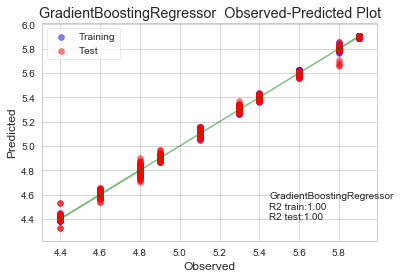

GradientBoostingRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.999


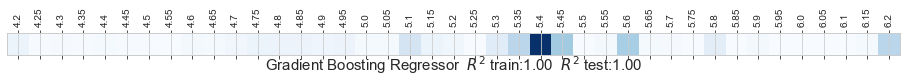

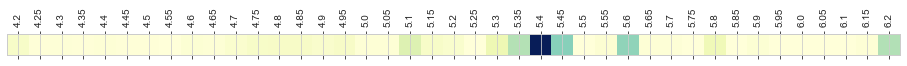

GradientBoostingRegressor
R2 Training Best score : 1.000
R Test Best score : 0.999


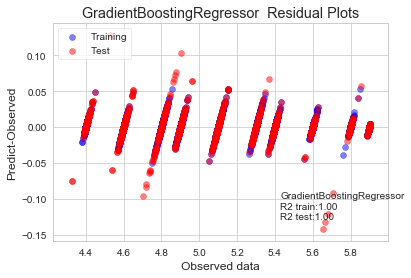

GradientBoostingRegressor
R2 Training Best score : 0.9996008323316451
R2 Test Best score : 0.998697125374069
Number of features: 41
Number of features used: 41


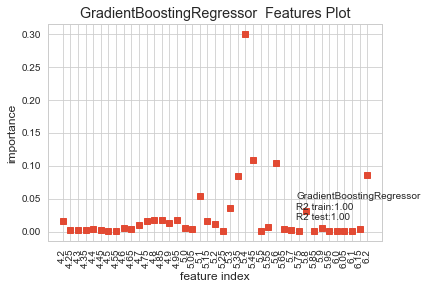

GB_elapsed_time:43.73392391204834 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.9998626048434953
R2 Test Best score : 0.9991501494546337
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.999

Test Root Mean Squared Error (RMSE): 0.012990548638627818
Test Mean Absolute Error (MAE): 0.005238483146071871
Test RMSE/MAE: 2.4798301867915544



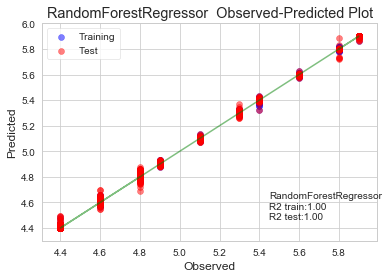

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.999


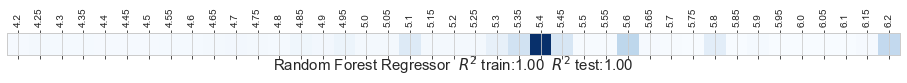

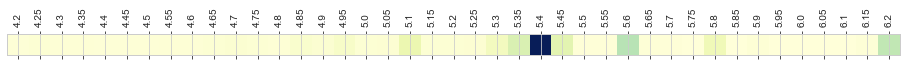

RandomForestRegressor
R2 Training Best score : 1.000
R Test Best score : 0.999


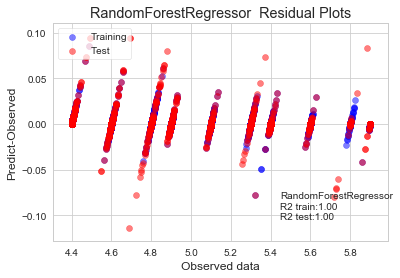

RandomForestRegressor
R2 Training Best score : 0.9998626048434953
R2 Test Best score : 0.9991501494546337
Number of features: 41
Number of features used: 41


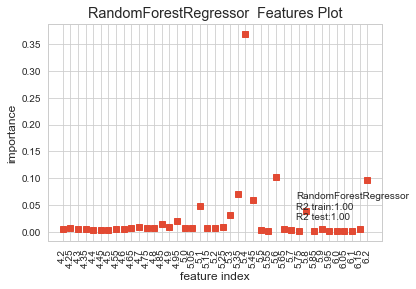

RF_elapsed_time:40.00598740577698 [sec]
-----

Save File Name:  sgb_xl4262_005.pkl srf_xl4262_005.pkl
elapsed_time:106.06664681434631 [sec]
finished time:  20200702 08:37:27
---------------------------------------------------------------------

Start time:  20200702 08:37:27
energy range, step: xl4060_010
X data list: start, end, step 4.0 6.0 0.1

x data(energy):[4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7
 5.8 5.9 6. ]

nor:30, ip:14, tp:5, bg:5, total spectra:10500
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6]
tp list:[100, 300, 500, 700, 900]
bg list:[0, 5, 25, 50, 100]

total: 10500
Normal(XL): 7707 7707
(7707, 21) (7707,)

GradientBoostingRegressor
R2 Training Best score : 0.9991600600376535
R2 Test Best score : 0.9974190163550668
Best paramator: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200

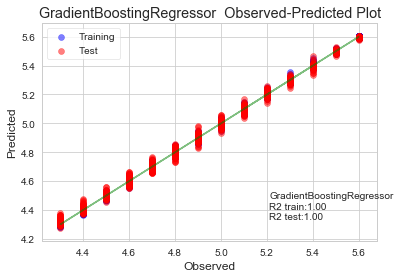

GradientBoostingRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.997


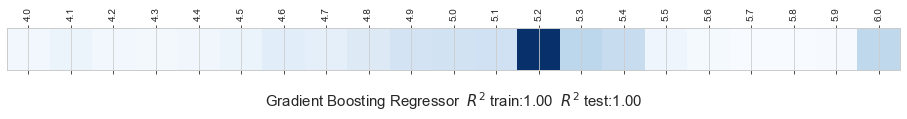

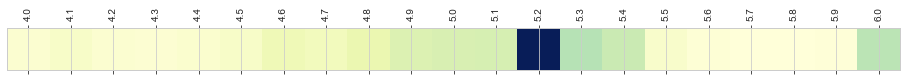

GradientBoostingRegressor
R2 Training Best score : 0.999
R Test Best score : 0.997


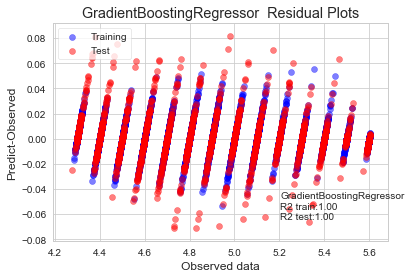

GradientBoostingRegressor
R2 Training Best score : 0.9991600600376535
R2 Test Best score : 0.9974190163550668
Number of features: 21
Number of features used: 21


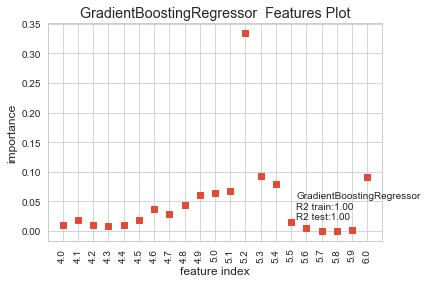

GB_elapsed_time:21.31414818763733 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.9996296103571146
R2 Test Best score : 0.9977093142522173
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998

Test Root Mean Squared Error (RMSE): 0.01815326020391661
Test Mean Absolute Error (MAE): 0.00971660181582499
Test RMSE/MAE: 1.8682725244901173



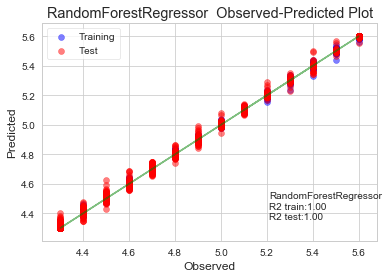

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998


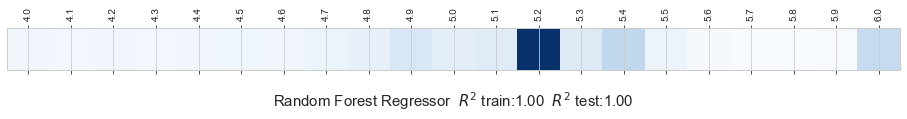

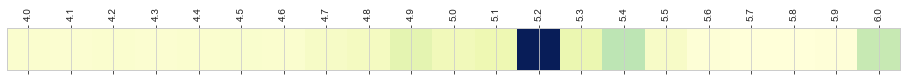

RandomForestRegressor
R2 Training Best score : 1.000
R Test Best score : 0.998


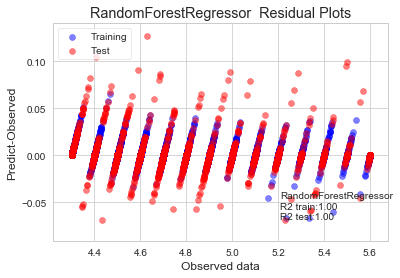

RandomForestRegressor
R2 Training Best score : 0.9996296103571146
R2 Test Best score : 0.9977093142522173
Number of features: 21
Number of features used: 21


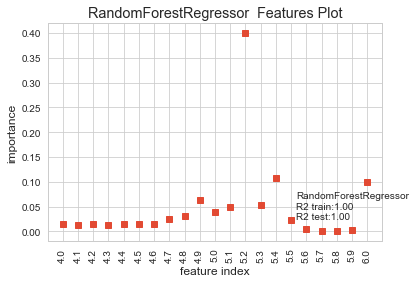

RF_elapsed_time:21.024977207183838 [sec]
-----

Save File Name:  sgb_xl4060_010.pkl srf_xl4060_010.pkl
elapsed_time:52.47111964225769 [sec]
finished time:  20200702 08:38:19
---------------------------------------------------------------------

Start time:  20200702 08:38:19
energy range, step: xl4265_005
X data list: start, end, step 4.2 6.5 0.05

x data(energy):[4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85
 4.9  4.95 5.   5.05 5.1  5.15 5.2  5.25 5.3  5.35 5.4  5.45 5.5  5.55
 5.6  5.65 5.7  5.75 5.8  5.85 5.9  5.95 6.   6.05 6.1  6.15 6.2  6.25
 6.3  6.35 6.4  6.45 6.5 ]

nor:30, ip:20, tp:5, bg:5, total spectra:15000
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[4.4 4.4 4.6 4.6 4.8 4.9 4.9 5.1 5.1 5.3 5.4 5.4 5.6 5.6 5.8 5.9 5.9 6.1
 6.1 6.3]
tp list:[100, 300, 500, 700, 900]
bg list:[0, 5, 25, 50, 100]

total: 15000
Normal(XL): 10735 10735
(10735, 47) (10735,)

G

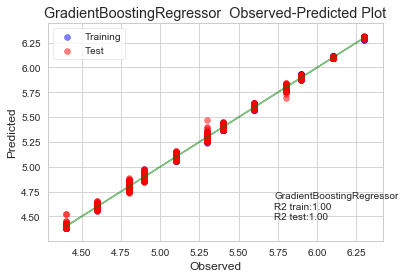

GradientBoostingRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.999


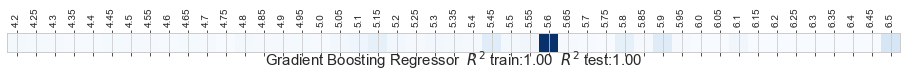

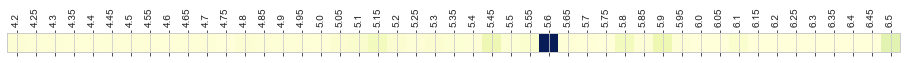

GradientBoostingRegressor
R2 Training Best score : 1.000
R Test Best score : 0.999


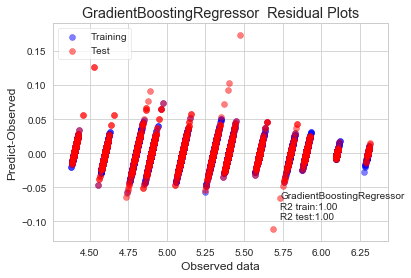

GradientBoostingRegressor
R2 Training Best score : 0.9995835959848248
R2 Test Best score : 0.9990181468026876
Number of features: 47
Number of features used: 47


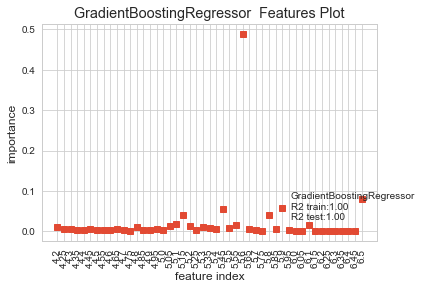

GB_elapsed_time:60.46013021469116 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.9998624572261072
R2 Test Best score : 0.9991045784749546
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.999

Test Root Mean Squared Error (RMSE): 0.01572417408563392
Test Mean Absolute Error (MAE): 0.005945039590131053
Test RMSE/MAE: 2.644923359591504



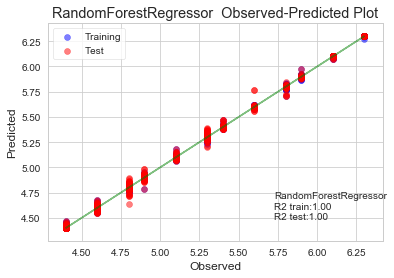

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.999


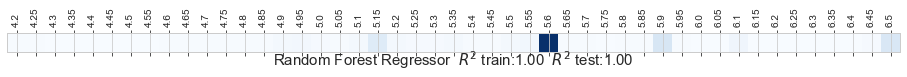

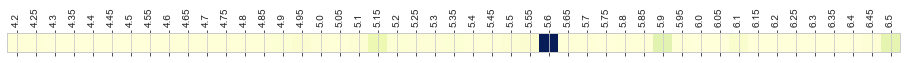

RandomForestRegressor
R2 Training Best score : 1.000
R Test Best score : 0.999


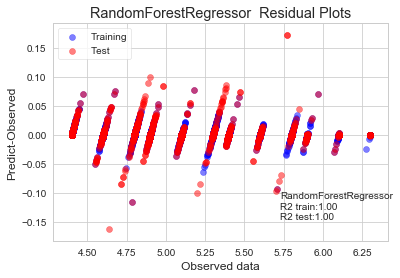

RandomForestRegressor
R2 Training Best score : 0.9998624572261072
R2 Test Best score : 0.9991045784749546
Number of features: 47
Number of features used: 47


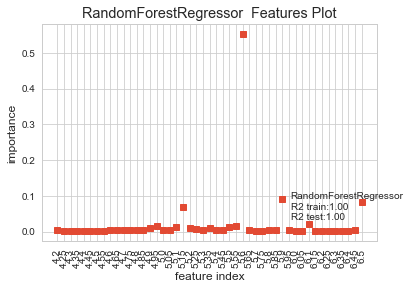

RF_elapsed_time:57.8245804309845 [sec]
-----

Save File Name:  sgb_xl4265_005.pkl srf_xl4265_005.pkl
elapsed_time:148.94527173042297 [sec]
finished time:  20200702 08:40:48
---------------------------------------------------------------------

Start time:  20200702 08:40:48
energy range, step: xl4265_010
X data list: start, end, step 4.2 6.5 0.1

x data(energy):[4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.2 6.3 6.4 6.5]

nor:30, ip:17, tp:5, bg:5, total spectra:12750
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1]
tp list:[100, 300, 500, 700, 900]
bg list:[0, 5, 25, 50, 100]

total: 12750
Normal(XL): 9556 9556
(9556, 24) (9556,)

GradientBoostingRegressor
R2 Training Best score : 0.9990990410732232
R2 Test Best score : 0.9976550796724305
Best paramator: {'learning_rate': 0.1, 'max_depth':

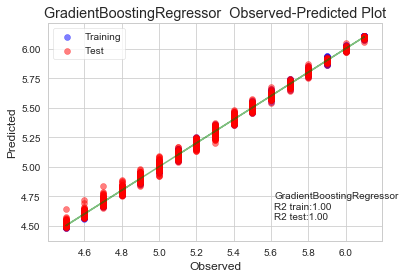

GradientBoostingRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.998


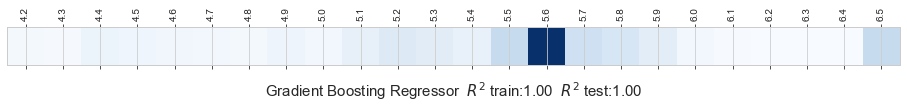

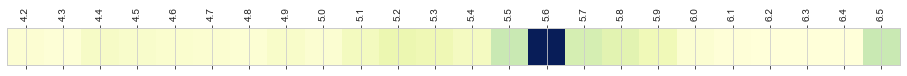

GradientBoostingRegressor
R2 Training Best score : 0.999
R Test Best score : 0.998


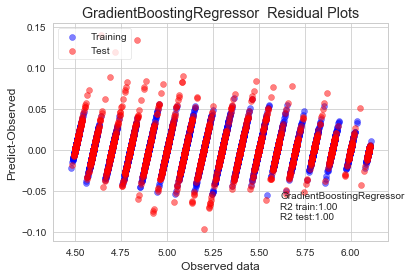

GradientBoostingRegressor
R2 Training Best score : 0.9990990410732232
R2 Test Best score : 0.9976550796724305
Number of features: 24
Number of features used: 24


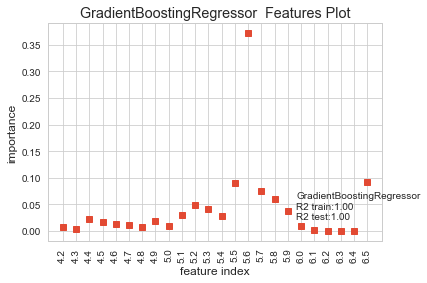

GB_elapsed_time:29.714223623275757 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.9997148576338337
R2 Test Best score : 0.9980953945449789
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998

Test Root Mean Squared Error (RMSE): 0.020180235214323675
Test Mean Absolute Error (MAE): 0.010768828451884047
Test RMSE/MAE: 1.8739489912473317



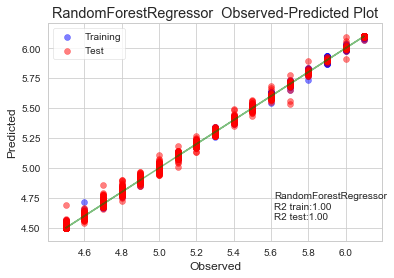

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998


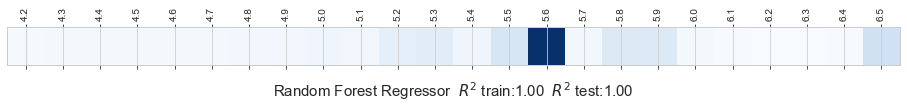

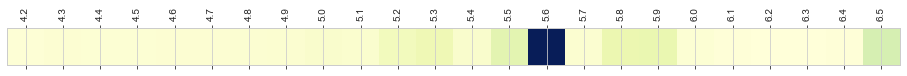

RandomForestRegressor
R2 Training Best score : 1.000
R Test Best score : 0.998


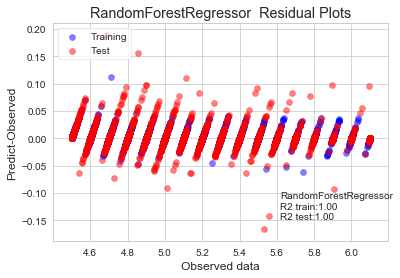

RandomForestRegressor
R2 Training Best score : 0.9997148576338337
R2 Test Best score : 0.9980953945449789
Number of features: 24
Number of features used: 24


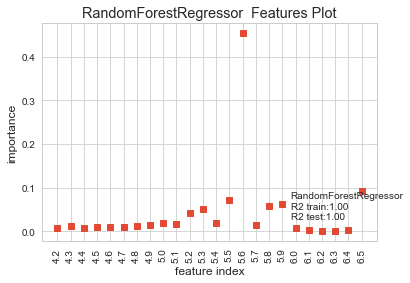

RF_elapsed_time:30.14611029624939 [sec]
-----

Save File Name:  sgb_xl4265_010.pkl srf_xl4265_010.pkl
elapsed_time:73.7898805141449 [sec]
finished time:  20200702 08:42:02
---------------------------------------------------------------------

Start time:  20200702 08:42:02
energy range, step: xl4067_010
X data list: start, end, step 4.0 6.7 0.1

x data(energy):[4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7
 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7]

nor:30, ip:21, tp:5, bg:5, total spectra:15750
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.
 6.1 6.2 6.3]
tp list:[100, 300, 500, 700, 900]
bg list:[0, 5, 25, 50, 100]

total: 15750
Normal(XL): 11997 11997
(11997, 28) (11997,)

GradientBoostingRegressor
R2 Training Best score : 0.9992882461603478
R2 Test Best score : 0.9982795235150906
Best paramator: 

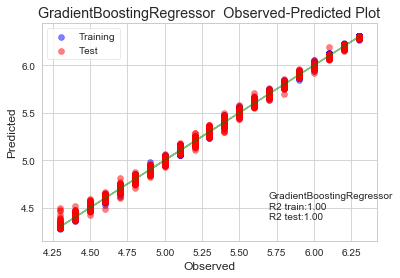

GradientBoostingRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.998


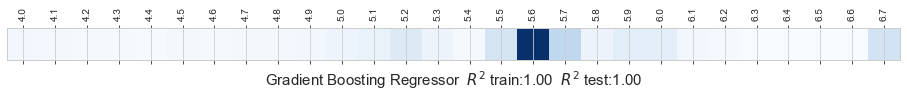

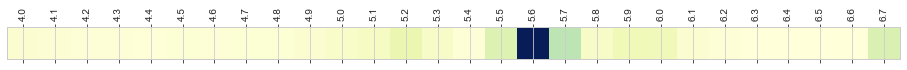

GradientBoostingRegressor
R2 Training Best score : 0.999
R Test Best score : 0.998


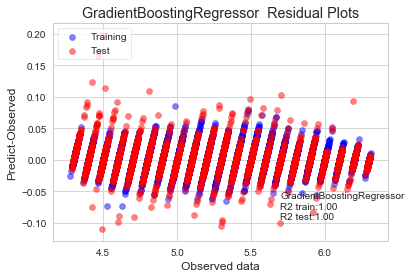

GradientBoostingRegressor
R2 Training Best score : 0.9992882461603478
R2 Test Best score : 0.9982795235150906
Number of features: 28
Number of features used: 28


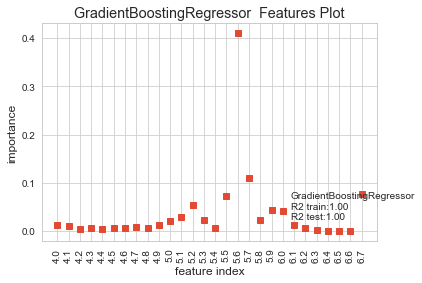

GB_elapsed_time:43.22255539894104 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.9997755196136553
R2 Test Best score : 0.9984473137793514
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998

Test Root Mean Squared Error (RMSE): 0.022628979852539487
Test Mean Absolute Error (MAE): 0.011748958333335216
Test RMSE/MAE: 1.9260413740965003



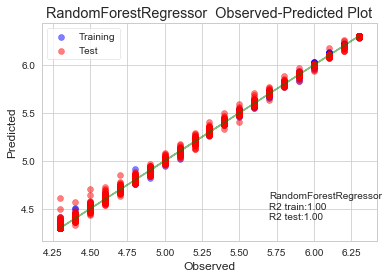

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998


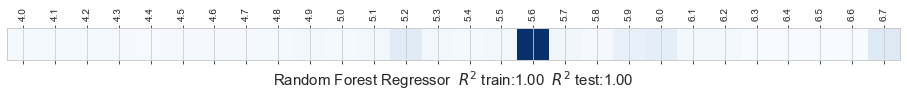

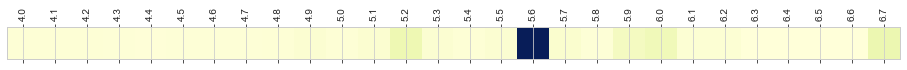

RandomForestRegressor
R2 Training Best score : 1.000
R Test Best score : 0.998


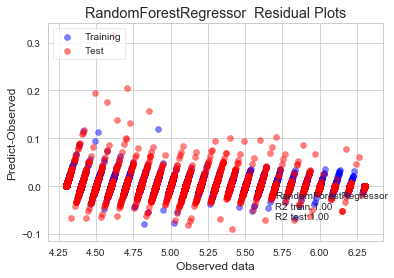

RandomForestRegressor
R2 Training Best score : 0.9997755196136553
R2 Test Best score : 0.9984473137793514
Number of features: 28
Number of features used: 28


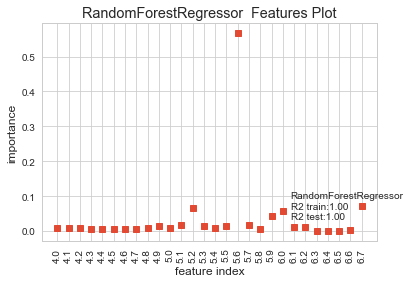

RF_elapsed_time:44.54381275177002 [sec]
-----

Save File Name:  sgb_xl4067_010.pkl srf_xl4067_010.pkl
elapsed_time:107.58286643028259 [sec]
finished time:  20200702 08:43:50
---------------------------------------------------------------------

Start time:  20200702 08:43:50
energy range, step: xl4067_005
X data list: start, end, step 4.0 6.7 0.05

x data(energy):[4.   4.05 4.1  4.15 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65
 4.7  4.75 4.8  4.85 4.9  4.95 5.   5.05 5.1  5.15 5.2  5.25 5.3  5.35
 5.4  5.45 5.5  5.55 5.6  5.65 5.7  5.75 5.8  5.85 5.9  5.95 6.   6.05
 6.1  6.15 6.2  6.25 6.3  6.35 6.4  6.45 6.5  6.55 6.6  6.65 6.7 ]

nor:30, ip:24, tp:5, bg:5, total spectra:18000
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.2 6.3 6.4 6.5]
tp list:[100, 300, 500, 700, 900]
bg list:[0, 5, 25, 50, 100]

tota

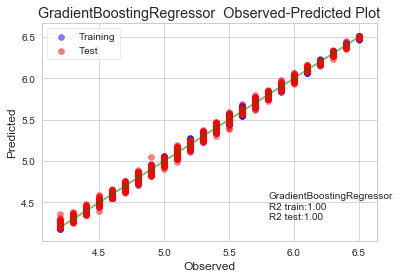

GradientBoostingRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.998


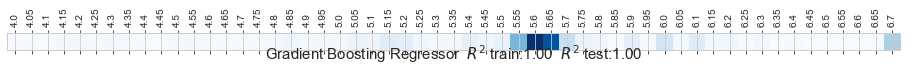

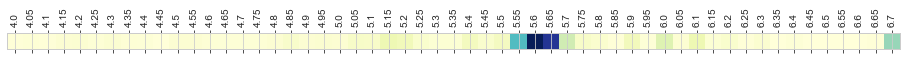

GradientBoostingRegressor
R2 Training Best score : 0.999
R Test Best score : 0.998


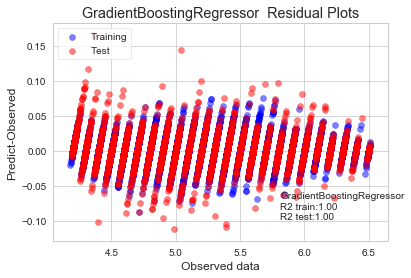

GradientBoostingRegressor
R2 Training Best score : 0.9993515346230435
R2 Test Best score : 0.998406219627377
Number of features: 55
Number of features used: 55


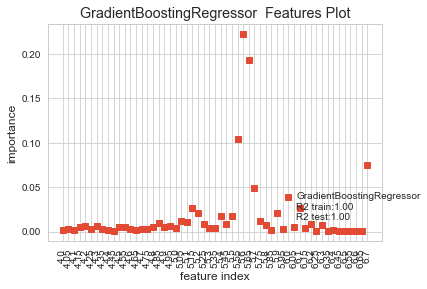

GB_elapsed_time:91.5822970867157 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.9997860902980495
R2 Test Best score : 0.9985444329534069
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.999

Test Root Mean Squared Error (RMSE): 0.024019195170095965
Test Mean Absolute Error (MAE): 0.01314651520985955
Test RMSE/MAE: 1.8270389366820328



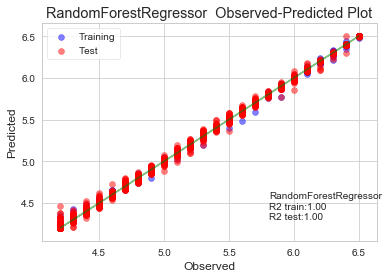

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.999


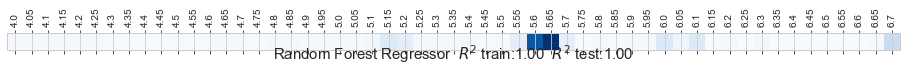

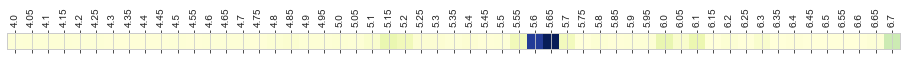

RandomForestRegressor
R2 Training Best score : 1.000
R Test Best score : 0.999


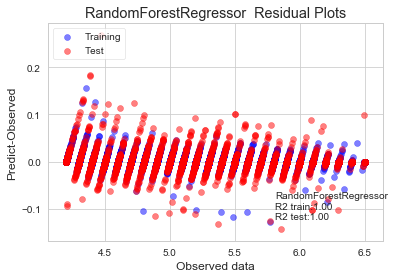

RandomForestRegressor
R2 Training Best score : 0.9997860902980495
R2 Test Best score : 0.9985444329534069
Number of features: 55
Number of features used: 55


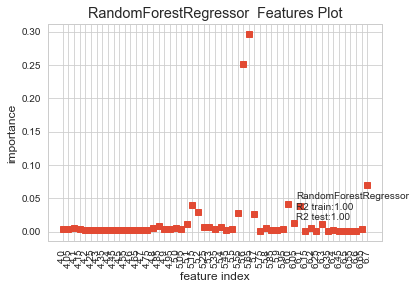

RF_elapsed_time:93.01198697090149 [sec]
-----

Save File Name:  sgb_xl4067_005.pkl srf_xl4067_005.pkl
elapsed_time:227.21673011779785 [sec]
finished time:  20200702 08:47:37
---------------------------------------------------------------------

Start time:  20200702 08:47:37
energy range, step: xl5067_010
X data list: start, end, step 5.0 6.7 0.1

x data(energy):[5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7]

nor:30, ip:11, tp:5, bg:5, total spectra:8250
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3]
tp list:[100, 300, 500, 700, 900]
bg list:[0, 5, 25, 50, 100]

total: 8250
Normal(XL): 5854 5854
(5854, 18) (5854,)

GradientBoostingRegressor
R2 Training Best score : 0.9992045796986485
R2 Test Best score : 0.9971721169989459
Best paramator: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

GradientBoostingRegresso

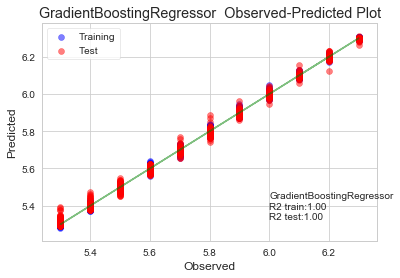

GradientBoostingRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.997


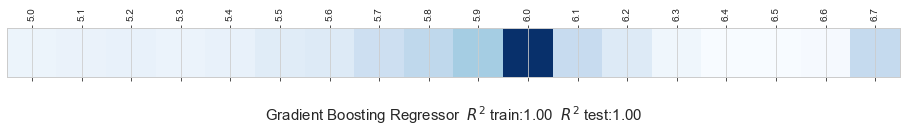

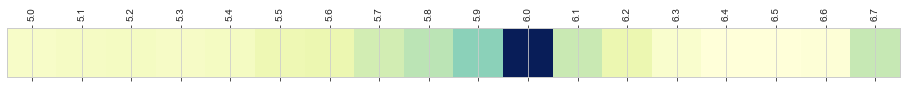

GradientBoostingRegressor
R2 Training Best score : 0.999
R Test Best score : 0.997


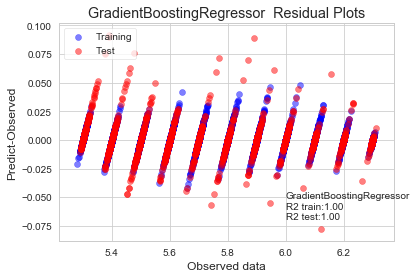

GradientBoostingRegressor
R2 Training Best score : 0.9992045796986485
R2 Test Best score : 0.9971721169989459
Number of features: 18
Number of features used: 18


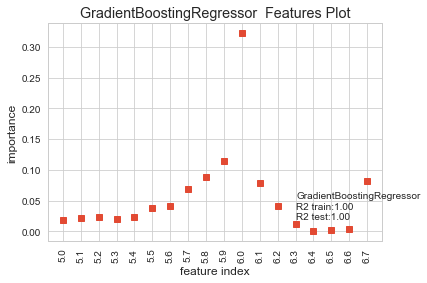

GB_elapsed_time:14.346130609512329 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.9994834324252551
R2 Test Best score : 0.9972341616413384
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.997

Test Root Mean Squared Error (RMSE): 0.015665237259983297
Test Mean Absolute Error (MAE): 0.007458582408200698
Test RMSE/MAE: 2.1002968664339483



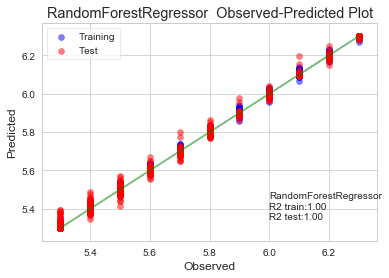

RandomForestRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.997


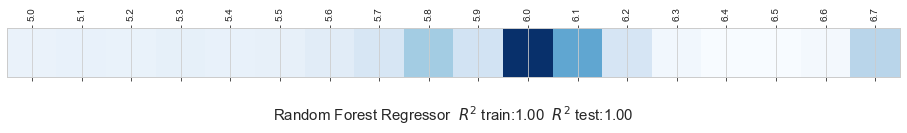

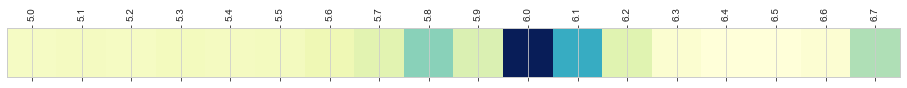

RandomForestRegressor
R2 Training Best score : 0.999
R Test Best score : 0.997


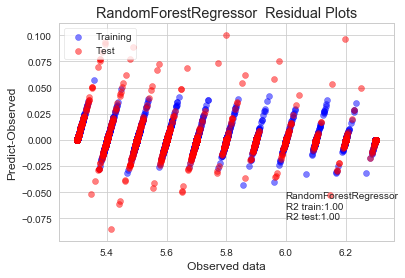

RandomForestRegressor
R2 Training Best score : 0.9994834324252551
R2 Test Best score : 0.9972341616413384
Number of features: 18
Number of features used: 18


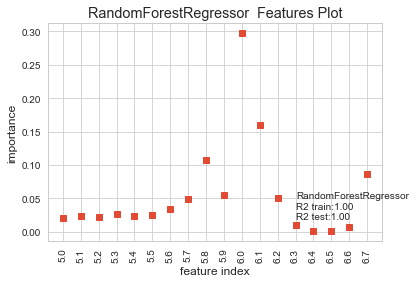

RF_elapsed_time:13.49530029296875 [sec]
-----

Save File Name:  sgb_xl5067_010.pkl srf_xl5067_010.pkl
elapsed_time:34.81041216850281 [sec]
finished time:  20200702 08:48:12
---------------------------------------------------------------------

Start time:  20200702 08:48:12
energy range, step: xl5067_005
X data list: start, end, step 5.0 6.7 0.05

x data(energy):[5.   5.05 5.1  5.15 5.2  5.25 5.3  5.35 5.4  5.45 5.5  5.55 5.6  5.65
 5.7  5.75 5.8  5.85 5.9  5.95 6.   6.05 6.1  6.15 6.2  6.25 6.3  6.35
 6.4  6.45 6.5  6.55 6.6  6.65 6.7 ]

nor:30, ip:14, tp:5, bg:5, total spectra:10500
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5]
tp list:[100, 300, 500, 700, 900]
bg list:[0, 5, 25, 50, 100]

total: 10500
Normal(XL): 6845 6845
(6845, 35) (6845,)

GradientBoostingRegressor
R2 Training Best score : 0.9993243251660081
R2 Test Best score : 0

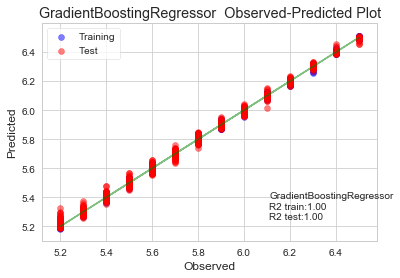

GradientBoostingRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.997


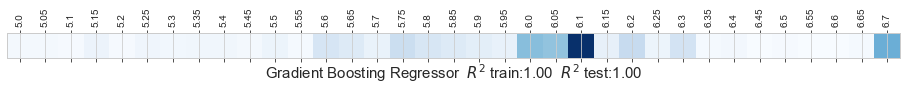

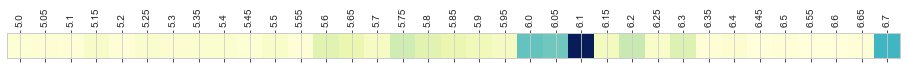

GradientBoostingRegressor
R2 Training Best score : 0.999
R Test Best score : 0.997


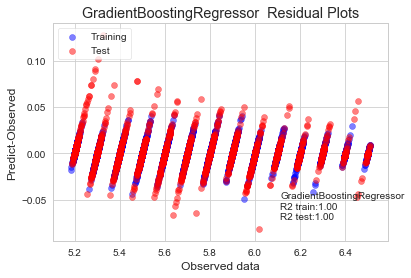

GradientBoostingRegressor
R2 Training Best score : 0.9993243251660081
R2 Test Best score : 0.9973595147671791
Number of features: 35
Number of features used: 35


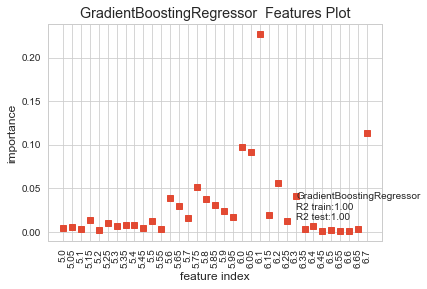

GB_elapsed_time:30.43410015106201 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.9996334477205919
R2 Test Best score : 0.997293425258796
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.997

Test Root Mean Squared Error (RMSE): 0.018675685453902843
Test Mean Absolute Error (MAE): 0.010210372534699813
Test RMSE/MAE: 1.8290895254246384



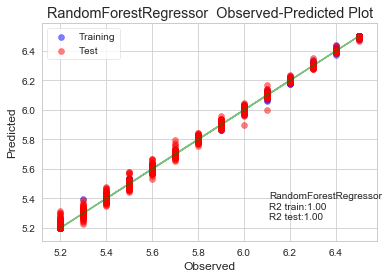

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.997


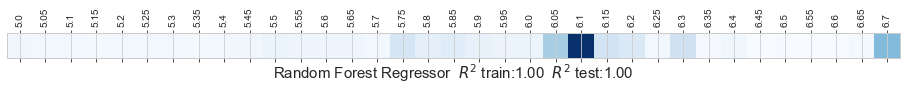

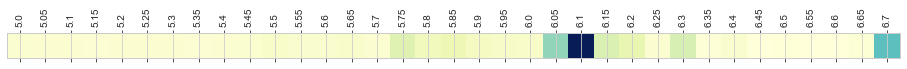

RandomForestRegressor
R2 Training Best score : 1.000
R Test Best score : 0.997


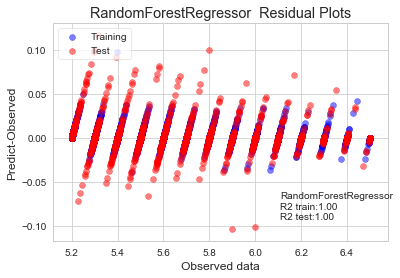

RandomForestRegressor
R2 Training Best score : 0.9996334477205919
R2 Test Best score : 0.997293425258796
Number of features: 35
Number of features used: 35


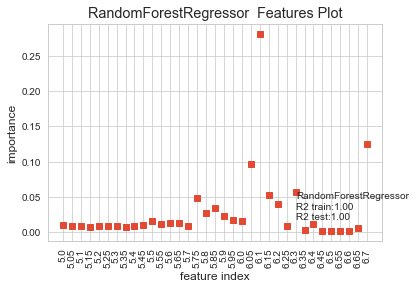

RF_elapsed_time:29.759671688079834 [sec]
-----

Save File Name:  sgb_xl5067_005.pkl srf_xl5067_005.pkl
elapsed_time:76.68654704093933 [sec]
finished time:  20200702 08:49:29
---------------------------------------------------------------------

Start time:  20200702 08:49:29
energy range, step: xl3462_010
X data list: start, end, step 3.4000000000000004 6.2 0.1

x data(energy):[3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1
 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2]

nor:30, ip:22, tp:5, bg:5, total spectra:16500
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4
 5.5 5.6 5.7 5.8]
tp list:[100, 300, 500, 700, 900]
bg list:[0, 5, 25, 50, 100]

total: 16500
Normal(XL): 12609 12609
(12609, 29) (12609,)

GradientBoostingRegressor
R2 Training Best score : 0.9992691525068131
R2 Test Best score : 0.9983844

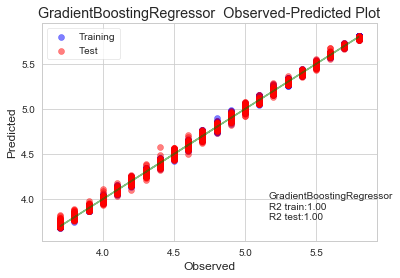

GradientBoostingRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.998


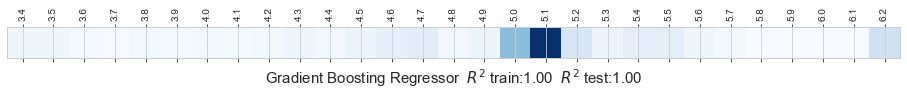

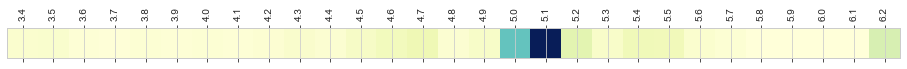

GradientBoostingRegressor
R2 Training Best score : 0.999
R Test Best score : 0.998


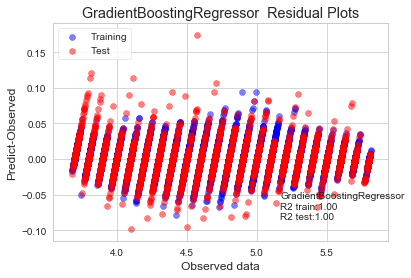

GradientBoostingRegressor
R2 Training Best score : 0.9992691525068131
R2 Test Best score : 0.9983844074578759
Number of features: 29
Number of features used: 29


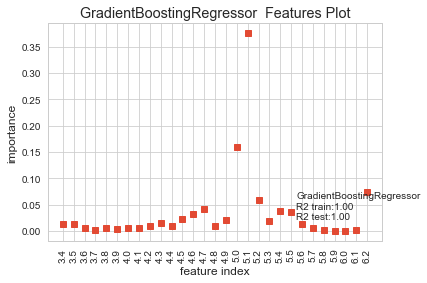

GB_elapsed_time:47.37076711654663 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.9997934841570868
R2 Test Best score : 0.9984866992922282
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998

Test Root Mean Squared Error (RMSE): 0.023439967950951435
Test Mean Absolute Error (MAE): 0.012550158604284945
Test RMSE/MAE: 1.8677029263158818



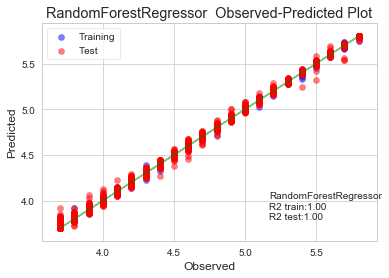

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998


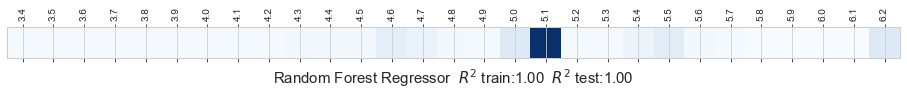

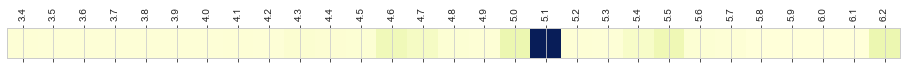

RandomForestRegressor
R2 Training Best score : 1.000
R Test Best score : 0.998


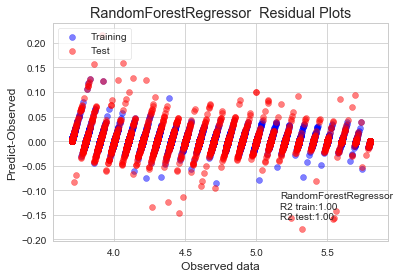

RandomForestRegressor
R2 Training Best score : 0.9997934841570868
R2 Test Best score : 0.9984866992922282
Number of features: 29
Number of features used: 29


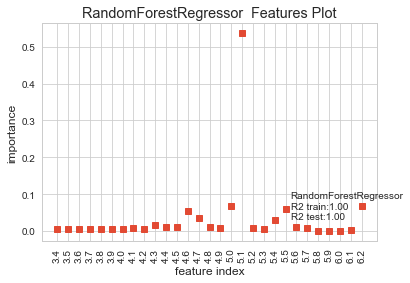

RF_elapsed_time:48.92869782447815 [sec]
-----

Save File Name:  sgb_xl3462_010.pkl srf_xl3462_010.pkl
elapsed_time:117.65345549583435 [sec]
finished time:  20200702 08:51:26
---------------------------------------------------------------------

Start time:  20200702 08:51:26
energy range, step: xl3462_005
X data list: start, end, step 3.4000000000000004 6.2 0.05

x data(energy):[3.4  3.45 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05
 4.1  4.15 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75
 4.8  4.85 4.9  4.95 5.   5.05 5.1  5.15 5.2  5.25 5.3  5.35 5.4  5.45
 5.5  5.55 5.6  5.65 5.7  5.75 5.8  5.85 5.9  5.95 6.   6.05 6.1  6.15
 6.2 ]

nor:30, ip:25, tp:5, bg:5, total spectra:18750
nor list:[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
ip list:[3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6. ]
tp list:[100, 300, 500, 700, 900]
bg 

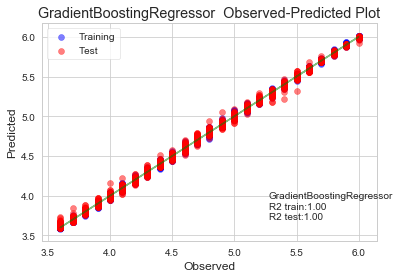

GradientBoostingRegressor
R2 Training Best score : 0.999
R2 Test Best score : 0.999


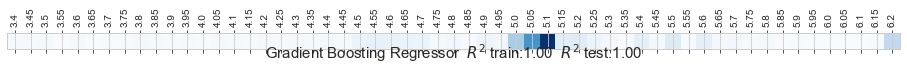

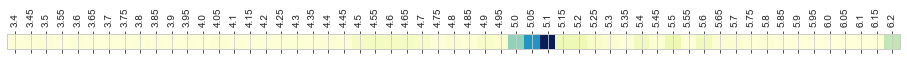

GradientBoostingRegressor
R2 Training Best score : 0.999
R Test Best score : 0.999


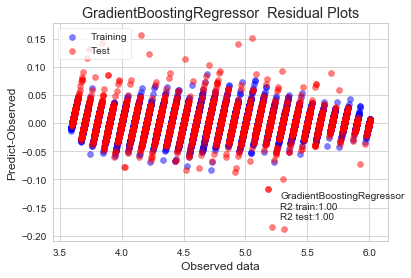

GradientBoostingRegressor
R2 Training Best score : 0.9994247726333142
R2 Test Best score : 0.9986243287135792
Number of features: 57
Number of features used: 57


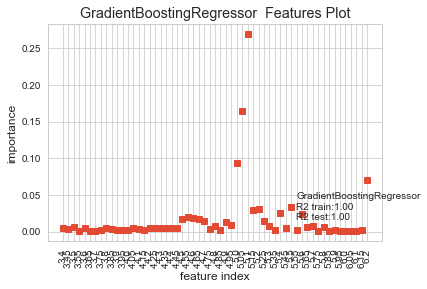

GB_elapsed_time:99.09761095046997 [sec]
-----

RandomForestRegressor
R2 Training Best score : 0.9997864905989492
R2 Test Best score : 0.9982827624398934
Best paramator: {'n_estimators': 200}

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998

Test Root Mean Squared Error (RMSE): 0.02725909262940849
Test Mean Absolute Error (MAE): 0.01316740250184191
Test RMSE/MAE: 2.0701951372410297



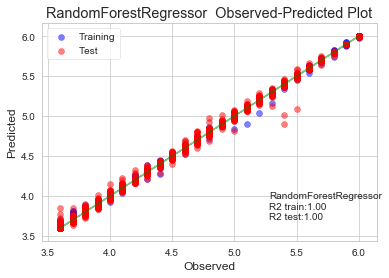

RandomForestRegressor
R2 Training Best score : 1.000
R2 Test Best score : 0.998


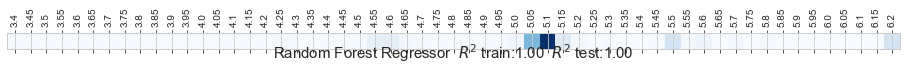

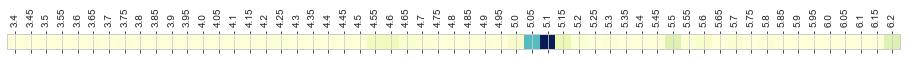

RandomForestRegressor
R2 Training Best score : 1.000
R Test Best score : 0.998


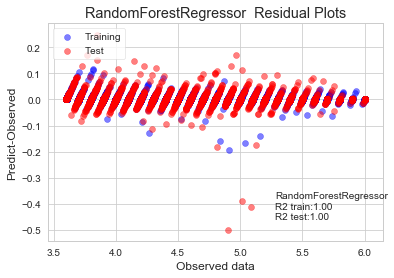

RandomForestRegressor
R2 Training Best score : 0.9997864905989492
R2 Test Best score : 0.9982827624398934
Number of features: 57
Number of features used: 57


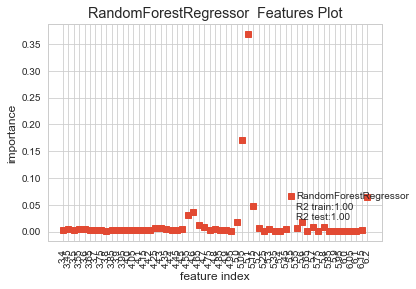

RF_elapsed_time:101.80808520317078 [sec]
-----

Save File Name:  sgb_xl3462_005.pkl srf_xl3462_005.pkl
elapsed_time:248.21732378005981 [sec]
finished time:  20200702 08:55:34
---------------------------------------------------------------------



In [6]:
for ii in xl_name_list:
    
    print("Start time: ",datetime.now().strftime('%Y%m%d %H:%M:%S') )
    start_time = time.time()
    
    #-----------make datasets---------------

    start=float(ii[2:4])*0.1
    end=float(ii[4:6])*0.1
    step=float(ii[7:10])*0.01
    print('energy range, step:', ii)
    print('X data list: start, end, step',start, end, step)
    print()
    
    # Xdata making
    x_data=ff.x_lists(start,end,step)
    
    #Nor setting
    nor_list=ff.x_lists(0.1,3,0.1)
    
    #IP setting （Xdataに依存して作成する。3番目の値から最後から-5までの値まで、0.1刻み)
    ip_list=ff.x_lists(x_data[3],x_data[-5],0.1)

    #Temp setting 
    temp_list=[100,300,500,700,900]
    
    #BGsetting 
    bg_list=[0,5,25,50,100]
    
    total_spectra=len(nor_list)*len(ip_list)*len(temp_list)*len(bg_list)
    
    print('x data(energy):{}'.format(x_data))
    print()
    print('nor:{0}, ip:{1}, tp:{2}, bg:{3}, total spectra:{4}'
          .format(len(nor_list),len(ip_list),len(temp_list),len(bg_list),total_spectra))
    print('nor list:{0}\nip list:{1}\ntp list:{2}\nbg list:{3}'.format(nor_list,ip_list,temp_list,bg_list))
    print()
    
    # SPYS spectra and ip（検出器が飽和するため最大カウントで制限している。）
    XL, yL, yL_all=ff.SPYS_data_ris_max_all(xdata=x_data, nor_list=nor_list, ip_list=ip_list,
                                            temp_list=temp_list, bg_list=bg_list, max_count=150, diff_count=7)
    
    print('total:',total_spectra)
    print('Normal(XL):',len(XL),len(yL))


    X=np.array(XL)
    y=np.array(yL)
    print(X.shape,y.shape)
    print()

    #-----------ML----------


    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8, random_state=0)
    
    
    start_time_gb = time.time()

    #-----------GB----------
#     gbparam= {'max_depth': [1, 2, 3, 4, 5], 'n_estimators': [5, 10, 50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
    gbparam={'max_depth': [5], 'n_estimators': [200], 'learning_rate': [0.1]}
    gbreg=gs.grid_gradientboosting(X_train, y_train, X_test, y_test,X_name_list=x_data,params=gbparam)
    
    elapsed_time_gb = time.time() - start_time_gb
    print ("GB_elapsed_time:{0} [sec]".format(elapsed_time_gb))
    print("-----")
    print()
    
    #-----------RF----------
    start_time_rf = time.time()
#     rfparam　= {'n_estimators': [5, 10, 50, 100, 200]}
    rfparam = {'n_estimators': [200]}
    rfreg=gs.grid_randomforest(X_train, y_train, X_test, y_test, x_data, params=rfparam)
    
    elapsed_time_rf = time.time() - start_time_rf
    print ("RF_elapsed_time:{0} [sec]".format(elapsed_time_rf))
    print("-----")
    print()
    
    #　Save Filename
    file_name_gb='sgb_{}.pkl'.format(ii)
    file_name_rf='srf_{}.pkl'.format(ii)
    print("Save File Name: ",file_name_gb, file_name_rf)

    
    dir_tstr_gb=".//{}//{}".format(tstr, file_name_gb)    
    dir_tstr_rf=".//{}//{}".format(tstr, file_name_rf)    
    joblib.dump(gbreg,dir_tstr_gb)
    joblib.dump(rfreg,dir_tstr_rf)
    
    elapsed_time = time.time() - start_time
    
    print ("elapsed_time:{0} [sec]".format(elapsed_time))
    print("finished time: ", datetime.now().strftime('%Y%m%d %H:%M:%S') )
    print("---------------------------------------------------------------------")
    print()

In [7]:
#Paramater file Load Test
sgb_xl3462_010 =joblib.load('spys_reg_20200702/sgb_xl3462_010.pkl')


In [8]:
sgb_xl3462_010

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)